In [1]:
#pytorch utility imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets

In [3]:
#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [4]:
#import libraries related to data Analysis and Visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import math
%matplotlib inline

In [5]:
os.getcwd()

'C:\\Users\\kakabala\\git.dl\\deeplearning\\mnist_classifier'

In [6]:
#Check for CUDA

print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

False
True


In [7]:
# load the train and test data into python dataframe
input_folder_path = "input/"
train_df = pd.read_csv(input_folder_path+"train.csv")
test_df = pd.read_csv(input_folder_path+"test.csv")

In [8]:
# extract trainimages , train lables and test images
train_labels = train_df['label'].values
train_images = (train_df.iloc[:,1:].values).astype('float32')
test_images = (test_df.iloc[:,:].values).astype('float32')

In [9]:
#Training and Validation Split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,
                                                                     stratify=train_labels, random_state=123,
                                                                     test_size=0.20)

In [10]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)
val_images = val_images.reshape(val_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

Text(0.5, 1.0, '8')

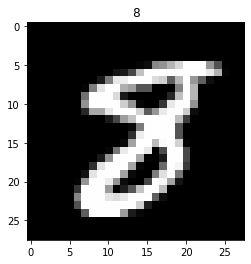

In [11]:
plt.imshow(train_images[10].squeeze(), cmap=plt.get_cmap('gray'))
plt.title(train_labels[10])

In [12]:
# convert train_images array to tensor
train_images_tensor = torch.tensor(train_images)/255.0
train_labels_tensor = torch.tensor(train_labels)

# load TensorDataset
train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)

In [13]:
# conversion for validation set
val_images_tensor = torch.tensor(val_images)/255.0
val_labels_tensor = torch.tensor(val_labels)

# load TensorDataset for validation data
val_tensor = TensorDataset(val_images_tensor, val_labels_tensor)

In [14]:
#test set tensor dataset
test_images_tensor = torch.tensor(test_images)/255.0

In [15]:
# DataLoader objects
train_loader = DataLoader(train_tensor, batch_size=16, shuffle=True)
val_loader = DataLoader(val_tensor, batch_size=16, shuffle=True)
test_loader = DataLoader(test_images_tensor, batch_size=16,shuffle=False)

In [16]:
# Linear model - size of input features, size of output features as parameters
linear_model = nn.Linear(28*28,10)

In [17]:
#computes the cross entropy loss between input and target
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy

In [18]:
# Optimizer to implement stochastic gradient descent Algorithm
optimizer = torch.optim.SGD(linear_model.parameters(), 0.001)

In [19]:
iter = 0
accuracy=0
for epoch in range(int(16)):
    print("epoch: {}. Accuracy: {}.".format(epoch, accuracy))
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        # below method call is made to set the gradients of all optimized torch Tensors to zero.
        optimizer.zero_grad()
        
        #predict the output
        outputs = linear_model(images)
        
        #derive the loss
        loss = criterion(outputs, labels)
        
        # loss.backward method called to compute the gradients
        loss.backward()
        
        # below method called to perform single optimization step - i.e. to update the parameters
        optimizer.step()
        
        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in val_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = linear_model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

epoch: 0. Accuracy: 0.
Iteration: 500. Loss: 1.780831217765808. Accuracy: 67.89286041259766.
Iteration: 1000. Loss: 1.4704134464263916. Accuracy: 75.73809814453125.
Iteration: 1500. Loss: 1.4212151765823364. Accuracy: 78.39286041259766.
Iteration: 2000. Loss: 1.066674828529358. Accuracy: 80.0952377319336.
epoch: 1. Accuracy: 80.0952377319336.
Iteration: 2500. Loss: 1.0463961362838745. Accuracy: 81.54762268066406.
Iteration: 3000. Loss: 0.9165847897529602. Accuracy: 82.07142639160156.
Iteration: 3500. Loss: 0.9771316647529602. Accuracy: 82.76190185546875.
Iteration: 4000. Loss: 0.6403618454933167. Accuracy: 83.48809814453125.
epoch: 2. Accuracy: 83.48809814453125.
Iteration: 4500. Loss: 0.6069902181625366. Accuracy: 83.63095092773438.
Iteration: 5000. Loss: 0.8480868935585022. Accuracy: 84.25.
Iteration: 5500. Loss: 0.666247546672821. Accuracy: 84.47618865966797.
Iteration: 6000. Loss: 0.8023431301116943. Accuracy: 84.76190185546875.
epoch: 3. Accuracy: 84.76190185546875.
Iteration: 650